# Interactive Visualization with Bokeh, HoloViews, and Datashader

<br>Owner: **Keith Bechtol** ([@bechtol](https://github.com/LSSTScienceCollaborations/StackClub/issues/new?body=@bechtol))
<br>Last Verified to Run: **2018-09-14**
<br>Verified Stack Release: **v16.0, w201831**

This notebook demonstrates a few of the interactive features of the [Bokeh](https://bokeh.pydata.org/en/latest/), [HoloViews](http://holoviews.org/), and [Datashader](http://datashader.org/) plotting packages in the notebook environment. These packages are part of the [PyViz](http://pyviz.org/) set of python tools intended for visualization use cases in a web browser, and can be used to create quite sophisticated dashboard-like interactive displays and widgets. The goal of this notebook is to provide an introduction and starting point from which to create more advanced, custom interactive visualizations. To get inspired, check out this beautiful [example notebook](https://github.com/timothydmorton/qa_explorer) using HSC data created with the [qa_explorer](https://github.com/timothydmorton/qa_explorer) tools.

### Learning Objectives
After working through and studying this notebook you should be able to
   1. Use `bokeh` to create interactive figures with brushing and linking between multiple plots
   2. Use `holoviews` and `datashader` to create two-dimensional histograms with dynamic binning to efficiently explore large datasets   

Other techniques that are demonstrated, but not empasized, in this notebook are
   1. Use `parquet` to efficiently access large amounts of data

### Logistics
This notebook is intended to be runnable on `lsst-lspdev.ncsa.illinois.edu` from a local git clone of https://github.com/LSSTScienceCollaborations/StackClub.

## Setup
You can find the Stack version by using `eups list -s` on the terminal command line.

In [1]:
# What version of the Stack am I using?
! echo $HOSTNAME
! eups list -s | grep lsst_distrib

jld-lab-kbechtol-r160
lsst_distrib          16.0+1     	current v16_0 setup


<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
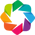

In [2]:
import numpy as np
import astropy.io.fits as pyfits

import bokeh
from bokeh.io import output_file, output_notebook, show
from bokeh.layouts import gridplot
from bokeh.models import ColumnDataSource, Range1d, HoverTool, Selection
from bokeh.plotting import figure, output_file

import holoviews as hv
from holoviews import streams
from holoviews.operation.datashader import datashade, dynspread, rasterize
hv.extension('bokeh')

In [3]:
# Need this line to display bokeh plots inline in the notebook
output_notebook()

Loading BokehJS ...

## Prelude: Data Sample

The data in the following example comes from the Dark Energy Survey Data Release 1 (DES DR1). The input data for this example obtained with the M2 globular cluster database query in Appendix C of the [DES DR1 paper](https://arxiv.org/abs/1801.03181) from the [DES Data Release page](https://des.ncsa.illinois.edu/releases/dr1/dr1-access).

In [4]:
infile = '/project/kbechtol/des/dr1/dr1_m2_dered_test.fits'
reader = pyfits.open(infile)
data = reader[1].data
reader.close()

data = data[data['MAG_AUTO_G_DERED'] < 26.]
print(len(data))

19450


## Part 1: Brushing and linking between scatter plots with Bokeh

First, an example with brushing and linking between two panels showing different repsentations of the same dataset. A selection applied to either panel will highlight the selected points in the other panel.

Based on http://bokeh.pydata.org/en/latest/docs/user_guide/interaction/linking.html#linked-brushing 

In [5]:
ra_target, dec_target = 323.36, -0.82

mag = data['MAG_AUTO_G_DERED']
color = data['MAG_AUTO_G_DERED'] - data['MAG_AUTO_R_DERED']

# create a column data source for the plots to share
source = ColumnDataSource(data=dict(x0=data['RA'] - ra_target,
                                    y0=data['DEC'] - dec_target,
                                    x1=color,
                                    y1=mag,
                                    ra=data['RA'],
                                    dec=data['DEC'],
                                    coadd_object_id=data['COADD_OBJECT_ID']))

In [6]:
# Create a custom hover tool on both panels
hover_left = HoverTool(tooltips=[("(RA,DEC)", "(@ra, @dec)"),
                                 ("(g-r,g)", "(@x1, @y1)"),
                                 ("coadd_object_id", "@coadd_object_id")])
hover_right = HoverTool(tooltips=[("(RA,DEC)", "(@ra, @dec)"),
                                  ("(g-r,g)", "(@x1, @y1)"),
                                  ("coadd_object_id", "@coadd_object_id")])
TOOLS = "box_zoom,box_select,lasso_select,reset,help"
TOOLS_LEFT = [hover_left, TOOLS]
TOOLS_RIGHT = [hover_right, TOOLS]

In [7]:
# create a new plot and add a renderer
left = figure(tools=TOOLS_LEFT, plot_width=500, plot_height=500, output_backend="webgl",
              title='Spatial: Centered on (RA, Dec) = (%.2f, %.2f)'%(ra_target, dec_target))
left.circle('x0', 'y0', hover_color='firebrick', source=source,
            selection_fill_color='steelblue', selection_line_color='steelblue',
            nonselection_fill_color='silver', nonselection_line_color='silver')
left.x_range = Range1d(0.3, -0.3)
left.y_range = Range1d(-0.3, 0.3)
left.xaxis.axis_label = 'Delta RA'
left.yaxis.axis_label = 'Delta DEC'

# create another new plot and add a renderer
right = figure(tools=TOOLS_RIGHT, plot_width=500, plot_height=500, output_backend="webgl",
               title='CMD')
right.circle('x1', 'y1', hover_color='firebrick', source=source,
             selection_fill_color='steelblue', selection_line_color='steelblue',
             nonselection_fill_color='silver', nonselection_line_color='silver')
right.x_range = Range1d(-0.5, 2.5)
right.y_range = Range1d(26., 16.)
right.xaxis.axis_label = 'g - r'
right.yaxis.axis_label = 'g'

p = gridplot([[left, right]])

# The plots can be exported as html files with data embedded
#output_file("bokeh_m2_example.html", title="M2 Example")

show(p)

Use the hover tool to see information about individual datapoints (e.g., the `coadd_object_id`). Notice the data points highlighted in one panel with the hover tool are also highlighted in the other panel. Next, use the selection box and selection lasso to make various selections in either panel. The selected data points will be displayed in the other panel.

### Introducing HoloViews Linked Streams

If we want to do subsequent calculations with the set of selected points, we can use HoloViews [linked streams](http://holoviews.org/user_guide/Custom_Interactivity.html) for custom interactivity. The following visualization is a modification of this [example](http://holoviews.org/reference/streams/bokeh/Selection1D_points.html).

In [8]:
%%output size=150
%%opts Points [tools=['box_select', 'lasso_select']]

# Declare some points
points = hv.Points((data['RA'] - ra_target, data['DEC'] - dec_target))

# Declare points as source of selection stream
selection = streams.Selection1D(source=points)

# Write function that uses the selection indices to slice points and compute stats
def selected_info(index):
    selected = points.iloc[index]
    if index:
        label = 'Mean x, y: %.3f, %.3f' % tuple(selected.array().mean(axis=0))
    else:
        label = 'No selection'
    return selected.relabel(label).options(color='red')

# Combine points and DynamicMap
points + hv.DynamicMap(selected_info, streams=[selection])

:Layout
   .Points.I     :Points   [x,y]
   .DynamicMap.I :DynamicMap   []
      :Points   [x,y]

In [9]:
print(selection.index)

[]


## Intermission: Rapid Data Access with Parquet

For the next example, we want to use a much larger dataset. Let's open up some data from Gata Data Release 2 (Gaia DR2) with Parquet. 

In [10]:
import glob
import pandas as pd
import pyarrow.parquet as pq

In [11]:
infiles = sorted(glob.glob('/project/shared/data/gaia_dr2_1am/*.parquet'))
print('There are %i total files in the directory'%(len(infiles)))

There are 500 total files in the directory


In [12]:
%%time
df_array = []
for ii in range(0, 10):
    print(infiles[ii])
    columns = ['ra', 'dec', 'phot_g_mean_mag'] # 'phot_g_mean_mag', 'phot_bp_mean_mag', 'phot_rp_mean_mag']
    df_array.append(pq.read_table(infiles[ii], columns=columns).to_pandas())
df = pd.concat(df_array)

/project/shared/data/gaia_dr2_1am/part-00000-f1412da4-8053-4819-87f7-4874011b6d30_00000.c000.snappy.parquet
/project/shared/data/gaia_dr2_1am/part-00001-f1412da4-8053-4819-87f7-4874011b6d30_00001.c000.snappy.parquet
/project/shared/data/gaia_dr2_1am/part-00002-f1412da4-8053-4819-87f7-4874011b6d30_00002.c000.snappy.parquet
/project/shared/data/gaia_dr2_1am/part-00003-f1412da4-8053-4819-87f7-4874011b6d30_00003.c000.snappy.parquet
/project/shared/data/gaia_dr2_1am/part-00004-f1412da4-8053-4819-87f7-4874011b6d30_00004.c000.snappy.parquet
/project/shared/data/gaia_dr2_1am/part-00005-f1412da4-8053-4819-87f7-4874011b6d30_00005.c000.snappy.parquet
/project/shared/data/gaia_dr2_1am/part-00006-f1412da4-8053-4819-87f7-4874011b6d30_00006.c000.snappy.parquet
/project/shared/data/gaia_dr2_1am/part-00007-f1412da4-8053-4819-87f7-4874011b6d30_00007.c000.snappy.parquet
/project/shared/data/gaia_dr2_1am/part-00008-f1412da4-8053-4819-87f7-4874011b6d30_00008.c000.snappy.parquet
/project/shared/data/gaia_dr

In [13]:
print('Dataframe contains %.2f M rows'%(len(df) / 1.e6))
print(df.columns.values)

Dataframe contains 38.73 M rows
['ra' 'dec' 'phot_g_mean_mag']


## Part 2: Visualizing Larger Datasets with Datashader

The interactive features of Bokeh work well with datasets up to a few tens of thousands of data points. To efficiently explore larger datasets, we'd like to use another visualization model that offers better scalability, namely Datashader.

In the examples below, notice that as one zooms in on the datashaded two-dimensional histograms, the bin sizes are dynamically adjusted to show finer or coarser granularity in the distribution. This allows one to interactively explore large datasets without having to manually adjust the bin sizes while panning and zooming. Zoom in all the way and you can see individual points (i.e., bins contain either zero or one count). In this particular example, we can see that the Gaia dataset has been sharded into narrow stripes in declination.

In [14]:
%%output size=150
#%%opts Points [tools=['box_select']]
points = hv.Points((df.ra, df.dec))
#points = hv.Points(np.random.multivariate_normal((0, 0), [[1, 0.1], [0.1, 1]], (1000,)))

# Declare points selection selection
#sel = streams.Selection1D(source=points)

boundsxy = (0, 0, 0, 0)
box = streams.BoundsXY(source=points, bounds=boundsxy)
bounds = hv.DynamicMap(lambda bounds: hv.Bounds(bounds), streams=[box]) 

#dynspread(datashade(points, cmap=bokeh.palettes.Viridis256))
datashade(points, cmap=bokeh.palettes.Viridis256) * bounds

:DynamicMap   []
   :Overlay
      .RGB.I    :RGB   [x,y]   (R,G,B,A)
      .Bounds.I :Bounds   [x,y]

Next we add callback functionality to the plot above and retrieve the indices of the selected points. First, use the box selection tool to create a selection box for the two-dimensional histogram above. Then run the cell below to count the number of datapoints within the selection region.

In [15]:
selection = (points.data.x > box.bounds[0]) \
    & (points.data.y > box.bounds[1]) \
    & (points.data.x < box.bounds[2]) \
    & (points.data.y < box.bounds[3])
print('The selection box contains %i datapoints'%(np.sum(selection)))
if np.sum(selection) > 0:
    print('\nHere are some of the selected indices...')
    print(np.nonzero(selection)[0])

The selection box contains 0 datapoints


Another option is to make a second linked plot paired with the box selection on the two-dimensional histogram.

In [16]:
# First, create a holoviews dataset instance. Here we label some of the columns.
kdims = [('ra', 'RA(deg)'), ('dec', 'Dec(deg)')]
vdims = [('phot_g_mean_mag', 'G(mag)')]
ds = hv.Dataset(df, kdims, vdims)
ds

:Dataset   [ra,dec]   (phot_g_mean_mag)

In [17]:
points = hv.Points(ds)

#boundsxy = (0, 0, 0, 0)
boundsxy = (np.min(ds.data['ra']), np.min(ds.data['dec']), np.max(ds.data['ra']), np.max(ds.data['dec']))
box = streams.BoundsXY(source=points, bounds=boundsxy)
box_plot = hv.DynamicMap(lambda bounds: hv.Bounds(bounds), streams=[box])

In [18]:
# This function defines the custom callback functionality to update the linked histogram
def update_histogram(bounds=bounds):
    
    selection = (ds.data['ra'] > bounds[0]) & \
                (ds.data['dec'] > bounds[1]) & \
                (ds.data['ra'] < bounds[2]) & \
                (ds.data['dec'] < bounds[3])
    
    selected_mag = ds.data.loc[selection]['phot_g_mean_mag']
    
    frequencies, edges = np.histogram(selected_mag)
    
    hist = hv.Histogram((np.log(frequencies), edges))
    return hist

In [19]:
%%output size=150
dmap = hv.DynamicMap(update_histogram, streams=[box])
datashade(points, cmap=bokeh.palettes.Viridis256) * box_plot + dmap

:Layout
   .DynamicMap.I  :DynamicMap   []
      :Overlay
         .RGB.I    :RGB   [ra,dec]   (R,G,B,A)
         .Bounds.I :Bounds   [x,y]
   .DynamicMap.II :DynamicMap   []
      :Histogram   [x]   (Frequency)

Notice that when you select different regions of the left panel with the box select tool, the histogram on the right is updated.

## Part 3: Images

The next example demonstrates image visualization at the pixel level with datashader.

In [20]:
# First get a sensor image
import lsst.daf.persistence as dafPersist

butler = dafPersist.Butler('/project/shared/data/Twinkles_subset/output_data_v2')
subset = butler.subset('calexp')
dataid = subset.cache[0]
image = butler.get('calexp', immediate=True, dataId=dataid)

In [21]:
%%opts Image  [height=600 width=650]
%%opts Bounds (color='white')
#%%output size=200

# Make a fake image just for testing purpose
#zz = np.random.poisson(100, size=(4000, 4000))
#xx, yy = np.meshgrid(np.arange(4000), np.arange(4000))
#zz += xx
#bounds=(0, 0, 4000, 4000)   # Coordinate system: (left, bottom, top, right)
#img = hv.Image(zz, bounds=bounds).options(colorbar=True, cmap=bokeh.palettes.Viridis256, logz=True)

# Use an actual sensor image
bounds_img = (0, 0, image.getDimensions()[0], image.getDimensions()[1])
img = hv.Image(np.log10(image.image.array), bounds=bounds_img).options(colorbar=True, cmap=bokeh.palettes.Viridis256) # Another option is logz=True

boundsxy = (0, 0, 0, 0)
box = streams.BoundsXY(source=img, bounds=boundsxy)
bounds = hv.DynamicMap(lambda bounds: hv.Bounds(bounds), streams=[box])

rasterize(img) * bounds

/opt/lsst/software/stack/python/miniconda3-4.3.21/lib/python3.6/site-packages/ipykernel/__main__.py:12: RuntimeWarning: invalid value encountered in log10


:DynamicMap   []
   :Overlay
      .Image.I  :Image   [x,y]   (z)
      .Bounds.I :Bounds   [x,y]

As with the histograms, it is possible to use interactive callback features on the image plots, such as the selection box.

In [22]:
box

BoundsXY(bounds=(0, 0, 0, 0))

Here's another version of the image with a tap stream instead of box select.

In [27]:
%%opts Image  [height=600 width=650]
%%opts Points (color='white' marker='x' size=20)

posxy = hv.streams.Tap(source=img, x=0, y=0)
marker = hv.DynamicMap(lambda x, y: hv.Points([(x, y)]), streams=[posxy])

rasterize(img) * marker

:DynamicMap   []
   :Overlay
      .Image.I  :Image   [x,y]   (z)
      .Points.I :Points   [x,y]

'X' marks the spot! What's the value at that location? Execute the next cell to find out.

In [28]:
print('The value at position (%.3f, %.3f) is %.3f'%(posxy.x, posxy.y, img[int(posxy.x), int(posxy.y)]))

The value at position (0.000, 0.000) is 1.255
